# 라이브러리 임포트

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 125081 files and direc

In [ ]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 88.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.9/495.9 kB 32.5 MB/s eta 0:00:00


In [ ]:
! pip install kiwipiepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.5/35.5 MB 28.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 61.0 MB/s eta 0:00:00
  Created wheel for kiwipiepy_model: filename=kiwipiepy_model-0.21.0-py3-none-any.whl size=35593192 sha256=8010cbd6a6d8666140f1abfa9549764a5ca37c4e9f5a20fd8cc5d99390297a2d
  Stored in directory: /root/.cache/pip/wheels/5f/94/81/3e8b1478625f1bdb3b72733dfe3086a8f77a8f25db2b1d746b
Successfully built kiwipiepy_model


In [ ]:
!pip install wordcloud matplotlib

In [ ]:
!pip install xgboost

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
from konlpy.tag import Okt
import re

In [ ]:
import pandas as pd

In [ ]:
from wordcloud import WordCloud
import numpy as np

# 데이터 불러오기

In [ ]:
review = pd.read_csv('/content/drive/MyDrive/멋쟁이사자처럼_DAB6/데이터톤/데이터/리뷰 데이터/naver+google_review_final.csv')

In [ ]:
review

,내용,라벨
0,겸사겸사 에버랜드 다시 방문요😇😇 🍄🥬🍄🥬🍄🥬🍄🥬🍄🥬🍄🥬🍄🥬🍄 어머낫~아들이 좋아하...,1
1,키이스케이프와 콜라보한 방탈출이 있다고 해서 다녀왔는데 너무너무너무 재미있었습니다....,1
2,에버랜드 1박2일 가족 나들이~ 화창한 날씨가 아닌 흐리고 비도 오고 아쉬움이 많긴...,1
3,에버랜드에 오랜만에 갔어요^^ 오랜만에가니 새로워요 먹거리도 많고 볼거리 놀거리 진...,1
4,일요일 오후 5시에 방문하니 주차도 수월하고 놀이기구 대기 시간도 짧아 여유롭게 즐...,1
...,...,...
6555,장미축제 기간에 방문하였고 에버랜드에서 직접 접목하여 개발한 장미가 인상적이었습니다...,1
6556,언제가도 즐거운 환상의 나라 에버랜드 ~~\n계절마다 다른 꽃과 퍼레이드\n갈때마다...,1
6557,에버랜드 너무 좋아요😂…,1
6558,"한여름이라 덥지만, 오히려 사람이 적어 대기 시간이 짧아서 좋았음. 신나는 물 파티...",0


# 라벨별 분포

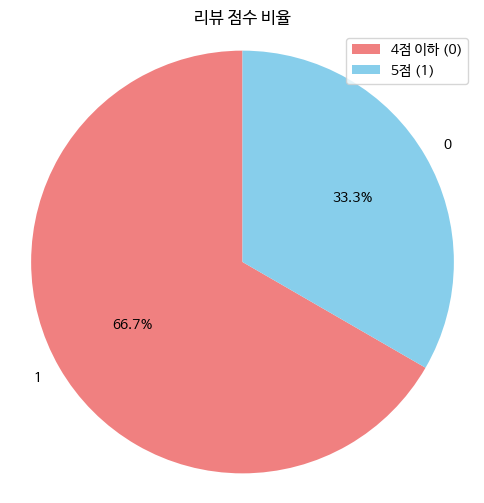

In [ ]:
import matplotlib.pyplot as plt

# Calculate the value counts of the '라벨' column
label_counts = review['라벨'].value_counts()

# Create custom labels for the legend
legend_labels = ['4점 이하 (0)', '5점 (1)']

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue']) # Swapped colors for better correspondence with the order of labels
plt.title('리뷰 점수 비율')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(legend_labels, loc="upper right") # Changed location to upper right
plt.show()

# 텍스트 전처리

In [ ]:
stop_words = [
    '것', '수', '들', '그', '이', '저', '및', '더', '등', '거', '제', '좀',
    '에서', '하다', '입니다', '으로', '하는', '에도', '하게', '하고', '하고싶다',
    '너무', '매우', '정말', '진짜', '때문', '위해', '하지만', '거나', '보다', '해서',
    '에서는', '으로서', '으로써', '하면서', '이면', '였다', '였다가', '이나', '에는', '곳', '분', '때', '탈', '서기', '년', '개', '시', '비', '하나', '날',
    '그냥', '정도', '안', '느낌', '거의', '이상', '타고', '한번', '말', '보고', '만', '듯', '별로', '도', '뭐', '원', '션', '함', '스', '밸리', '전', '다시', '어',
    '일', '프레', '가지', '왜', '해', '못', '애', '기분', '볼', '번', '이제', '역시', '가면', '만원', '임', '문', '자유', '장소', '지금', '한국',
    '할인', '내', '몇개', '조금', '월','꼭', '바로', '제대로', '기도', '레', '찬스', '게', '가세', '후', '앞', '요', '점', '다음', '또', '이후',
    '온', '뭔가', '곳도', '점점', '중', '동안', '대한', '계속', '자주', '또한', '음', '이번', '티', '완전','모든', '요즘', '전체', '나라', '년전',
    '베이', '항상', '땐', '외', '무슨', '인지', '안해', '초', '쪽', '토피아', '가기', '우리', '제로', '늘', '데리',
    '이다', '오다', '없다', '과', '같다', '놀다', '다', '자다', '한', '와', '고', '까지', '있다', '없다', '오다', '한', '이다', '다', '같다',
    '고', '과', '아니다', '서', '그리고', '이라', '나', '인데', '에', '가', '을', '는', '은', '가다', '의', '를', '로', '되다', '않다', '대', '타다',
    '적', '그래도', '되어다', '넘다', '많이', '생각', '기본', '먹다', '기', '그렇다', '들어가다', '서다', '그래도' ,
    '부터', '예전', '받다', '싶다', '인', '만에',
    '안되다', '두', '비다', '다녀오다', '엔', '같다', '하', '내다', '니', '나오다', '들다', '많다', '적다', '좋아요', '놀이기구', '많아서', '많고', '많음',
    '있어서', '있는', '있습니다', '있어요', '좋았습니다', '좋습니다', '같아요', '많아요', '좋은', '즐거운', '가서', '있어', '많으니', '생각보다', '재밌고', '좋네요',
    '갑니다', '왔어요', '재미있게', '추천합니다', '좋겠어요', '이미', '때문에', '차라리', '않고', '가세요', '아니면', '것도', '있고', '그런지', '이미', '같아요', '타려면',
    '엄청', '오랜만에', '그런데', '생각보다', '곳이', '비해', '가서', '근데', '것이', '절대', '갔는데', '있음', '곳이', '이젠', '생각이', '했는데', '이렇게', '최고', '행복',
    '완벽', '추천', '방문', '감사','준비','에버랜드', '성공', '힐링', '우리나라', '즐거움', '내외', '필수',
    '아들', '고민', '휴가', '만족', '사랑', '전반', '이유', '추가', '일반', '장사', '최악', '실망', '불편', '기쁨', '하루', '한창', '이해','유명', '세계', '사람', '시간', '아쉬움',
    '에', '에도', '인데도', '은',
    '놀이', '기구', '오랜만', '월드', '가능'
]

In [ ]:
# !pip install kiwipiepy
import re
import pandas as pd
from kiwipiepy import Kiwi
from collections import Counter

# 0) 데이터프레임/컬럼 설정
#   - 너의 데이터 컬럼명이 'content'가 아니라면 아래 text_col만 바꿔줘 (예: '내용', 'review')
text_col = '내용'

# 1) 형태소 분석기 (Java 불필요)
kiwi = Kiwi()

# 3) 전처리 함수: 한글/공백만 유지 → 품사분석 → 명사(NN*)만 추출 → 불용어/한글자 제거
def clean_and_tokenize_nouns(text: str):
    text = re.sub(r'[^가-힣\s]', ' ', str(text))
    # Kiwi 토큰: (form, tag, start, length, score)
    # 명사 품사: NNG(일반명사), NNP(고유명사), NNB(의존명사) 등 'NN'으로 시작
    tokens = [t.form for t in kiwi.tokenize(text) if t.tag.startswith('NN')]
    tokens = [t for t in tokens if t not in stop_words and len(t) > 1]
    return tokens

# 4) 토큰/클린문장 생성
review['tokens'] = review[text_col].apply(clean_and_tokenize_nouns)
review['clean_review'] = review['tokens'].apply(lambda toks: ' '.join(toks))

# 5) (선택) 상위 빈도 체크 — 너가 쓰던 패턴과 동일
all_tokens = [tok for toks in review['tokens'] for tok in toks]
word_counts = Counter(all_tokens)
most_common_words = word_counts.most_common(50)
print(most_common_words[:10])  # 상위 10개만 예시 출력

[('아이', 968), ('대기', 605), ('사파리', 559), ('퍼레이드', 510), ('평일', 482), ('동물', 449), ('이용', 437), ('익스프레스', 426), ('입장', 357), ('예약', 346)]


# 긍정 부정 키워드 분석 (머신러닝)
- 머신러닝(TF-IDF + Logistic Regression) 을 이용해 키워드(단어)별 감정 영향력 분석

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=10000,  # 상위 5천 단어 사용
    ngram_range=(1, 2),) # “너무 비싸”, “줄 길다” 등 문맥 반영
X = vectorizer.fit_transform(review['clean_review'])
y = review['라벨'] # Use the existing numerical labels

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 클래스 불균형 자동 보정 (class_weight='balanced')
logistic = LogisticRegression(
    max_iter=10000,
    n_jobs=-1,
    class_weight='balanced'
)

logistic.fit(X_train, y_train)

y_pred = logistic.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.49      0.48       656
           1       0.74      0.71      0.73      1312

    accuracy                           0.64      1968
   macro avg       0.60      0.60      0.60      1968
weighted avg       0.65      0.64      0.64      1968



# SVM 모델

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

svm = LinearSVC(
    C=0.5,                 # 규제 강도 (↑ 과적합, ↓ 과소적합 완화)
    loss='squared_hinge',
    max_iter=15000
)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.27      0.35       656
           1       0.70      0.87      0.78      1312

    accuracy                           0.67      1968
   macro avg       0.60      0.57      0.56      1968
weighted avg       0.64      0.67      0.63      1968

[[ 174  482]
 [ 170 1142]]


### XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1️⃣ 불균형 보정용 기본 파라미터 정의
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'scale_pos_weight': 1.3   # 클래스 불균형 보정 (부정 클래스 가중치 ↑)
}

# 2️⃣ XGBClassifier 초기화
xgb = XGBClassifier(
    **params,                  # ← 여기서 params 딕셔너리 언패킹
    use_label_encoder=False,
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# 3️⃣ 모델 학습
xgb.fit(X_train, y_train)

# 4️⃣ 예측 및 평가
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:49:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.50      0.21      0.30       656
           1       0.69      0.89      0.78      1312

    accuracy                           0.67      1968
   macro avg       0.60      0.55      0.54      1968
weighted avg       0.63      0.67      0.62      1968

[[ 140  516]
 [ 139 1173]]


### 머신러닝 기반 결과

In [ ]:
import numpy as np

feature_names = np.array(vectorizer.get_feature_names_out())
coef = logistic.coef_.flatten() # svm, logistic
# coef = xgb.feature_importances_

pos_keywords = feature_names[np.argsort(coef)[-30:][::-1]]  # 상위 30개 긍정 단어
neg_keywords = feature_names[np.argsort(coef)[:30]]          # 상위 30개 부정 단어

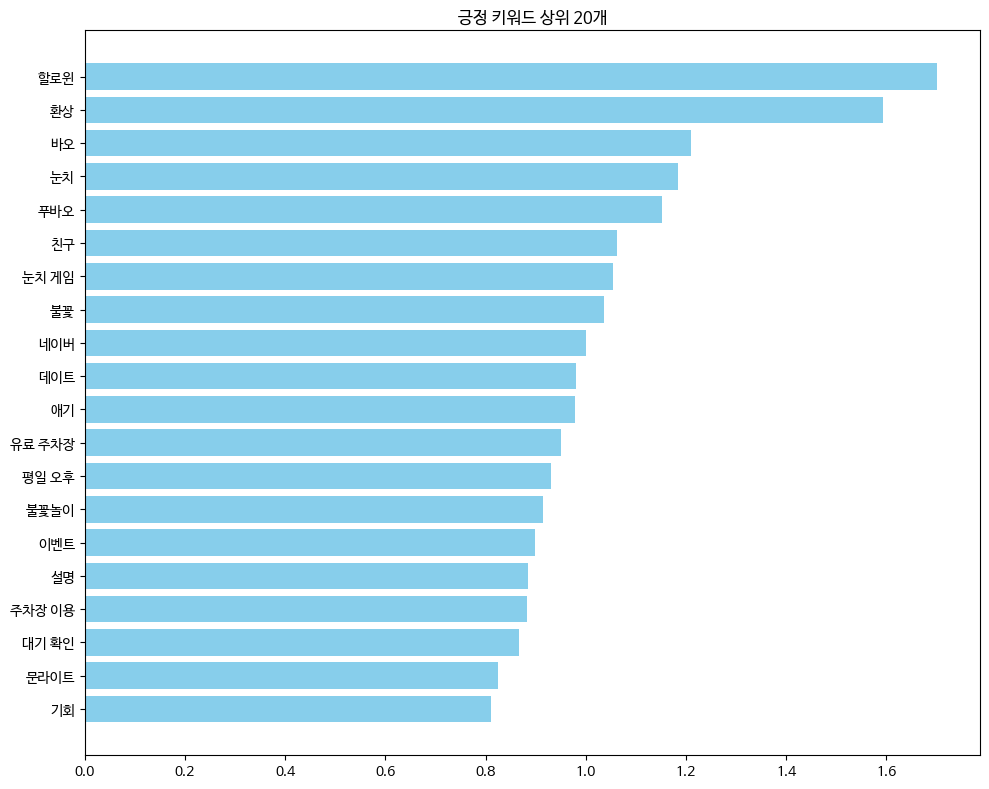

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

pos_keywords_20 = feature_names[np.argsort(coef)[-20:][::-1]]

plt.figure(figsize=(10, 8)) # Increase the figure size
plt.barh(pos_keywords_20[::-1], np.sort(coef)[-20:], color='skyblue')
plt.title("긍정 키워드 상위 20개")
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

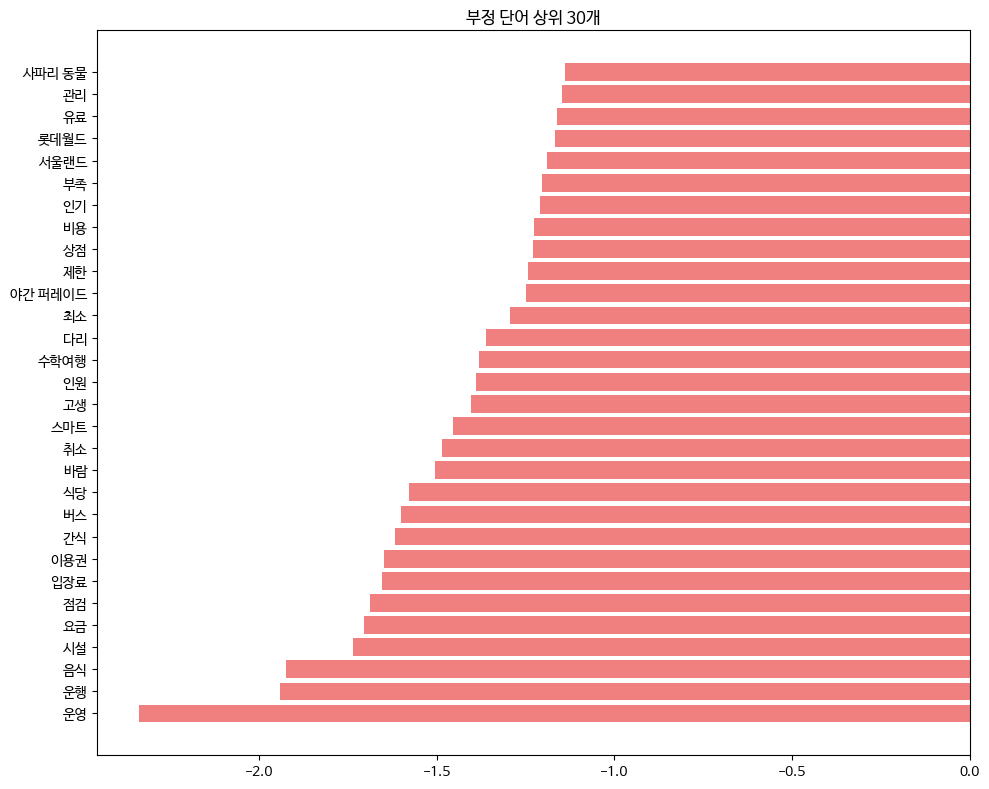

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 8)) # Increase the figure size
plt.barh(neg_keywords, np.sort(coef)[:30], color='lightcoral')
plt.title("부정 단어 상위 30개")
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

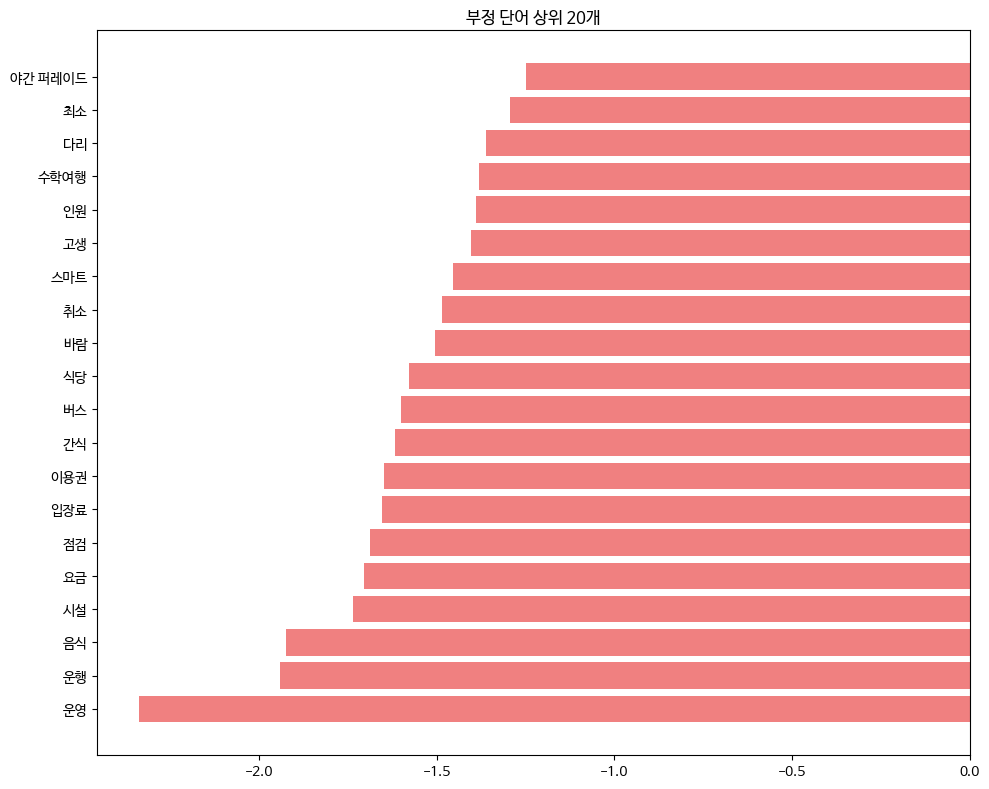

In [ ]:
neg_keywords_20 = feature_names[np.argsort(coef)[:20]]
plt.figure(figsize=(10, 8)) # Increase the figure size
plt.barh(neg_keywords_20, np.sort(coef)[:20], color='lightcoral')
plt.title("부정 단어 상위 20개")
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## 긍정 부정 워드클라우드 (머신러닝 감정분석 기반)

In [ ]:
# !pip install wordcloud matplotlib

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import random

# 1️⃣ 단어명(feature)과 계수(coef_) 불러오기
feature_names = np.array(vectorizer.get_feature_names_out())
coef = logistic.coef_.flatten()

# 2️⃣ 상위 긍정/부정 단어 추출
pos_words = {feature_names[i]: coef[i] for i in np.argsort(coef)[-100:]}   # 긍정 (큰 양수)
neg_words = {feature_names[i]: abs(coef[i]) for i in np.argsort(coef)[:100]}  # 부정 (큰 음수 → 절댓값)

# 3️⃣ 색상 함수 정의
def deep_green_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # HSL 색상: 120도(초록), 채도 80~100%, 명도 25~45% → 진하고 선명한 초록
    return f"hsl({random.randint(115, 130)}, {random.randint(80,100)}%, {random.randint(25,45)}%)"

def red_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # 빨강 계열 (부정)
    return f"hsl({random.randint(0, 20)}, 70%, {random.randint(40, 70)}%)"

# 4️⃣ 한글 폰트 설정 (환경에 맞게 수정)
font_path="/usr/share/fonts/truetype/nanum/NanumGothic.ttf"




In [ ]:
# 5️⃣ 워드클라우드 생성 및 시각화
wc = WordCloud(
    font_path=font_path,
    background_color='white',
    width=800,
    height=600
)

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128153 (\N{BLUE HEART}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


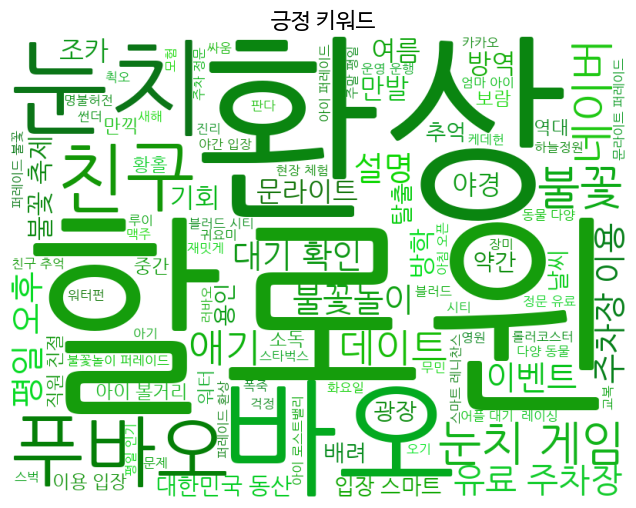

In [ ]:

# 긍정 단어
plt.figure(figsize=(10,6))
plt.title("💙 긍정 키워드", fontsize=16)
plt.imshow(wc.generate_from_frequencies(pos_words).recolor(color_func=deep_green_color_func))
plt.axis('off')
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10084 (\N{HEAVY BLACK HEART}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


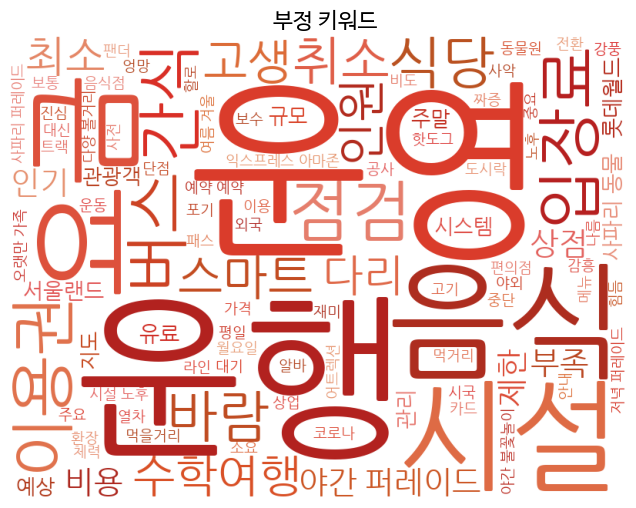

In [ ]:
# 부정 단어
plt.figure(figsize=(10,6))
plt.title("❤️ 부정 키워드", fontsize=16)
plt.imshow(wc.generate_from_frequencies(neg_words).recolor(color_func=red_color_func))
plt.axis('off')
plt.show()

-------
# 단어 빈도수 기반 분석

In [ ]:
positive_reviews = review[review['라벨'] == 1]
negative_reviews = review[review['라벨'] == 0]

## 단어 빈도 계산


In [ ]:
from collections import Counter

pos_word_counts = Counter()
for tokens in positive_reviews['tokens']:
    pos_word_counts.update(tokens)

neg_word_counts = Counter()
for tokens in negative_reviews['tokens']:
    neg_word_counts.update(tokens)

## 상위 30개 단어 추출



In [ ]:
top_pos_words = pos_word_counts.most_common(30)
top_neg_words = neg_word_counts.most_common(30)

print("Top 30 Positive Words:")
for word, count in top_pos_words:
    print(f"{word}: {count}")

print("\nTop 30 Negative Words:")
for word, count in top_neg_words:
    print(f"{word}: {count}")

Top 30 Positive Words:
아이: 667
사파리: 344
퍼레이드: 340
대기: 337
동물: 303
평일: 275
익스프레스: 274
이용: 236
가족: 226
날씨: 221
불꽃놀이: 211
입장: 210
축제: 194
예약: 191
스마트: 176
오후: 161
환상: 158
추억: 148
놀이공원: 148
주차장: 148
할로윈: 147
구경: 144
시설: 140
주말: 140
사진: 138
다양: 135
볼거리: 135
공연: 134
거리: 131
야간: 129

Top 30 Negative Words:
아이: 301
대기: 268
사파리: 215
평일: 207
이용: 201
시설: 183
퍼레이드: 170
스마트: 156
예약: 155
익스프레스: 152
주차장: 151
입장: 147
동물: 146
놀이공원: 123
음식: 120
주말: 119
직원: 102
코로나: 97
주차: 95
구경: 94
날씨: 92
운영: 91
오후: 89
거리: 89
가격: 82
식당: 81
축제: 80
불꽃놀이: 80
가족: 78
볼거리: 73


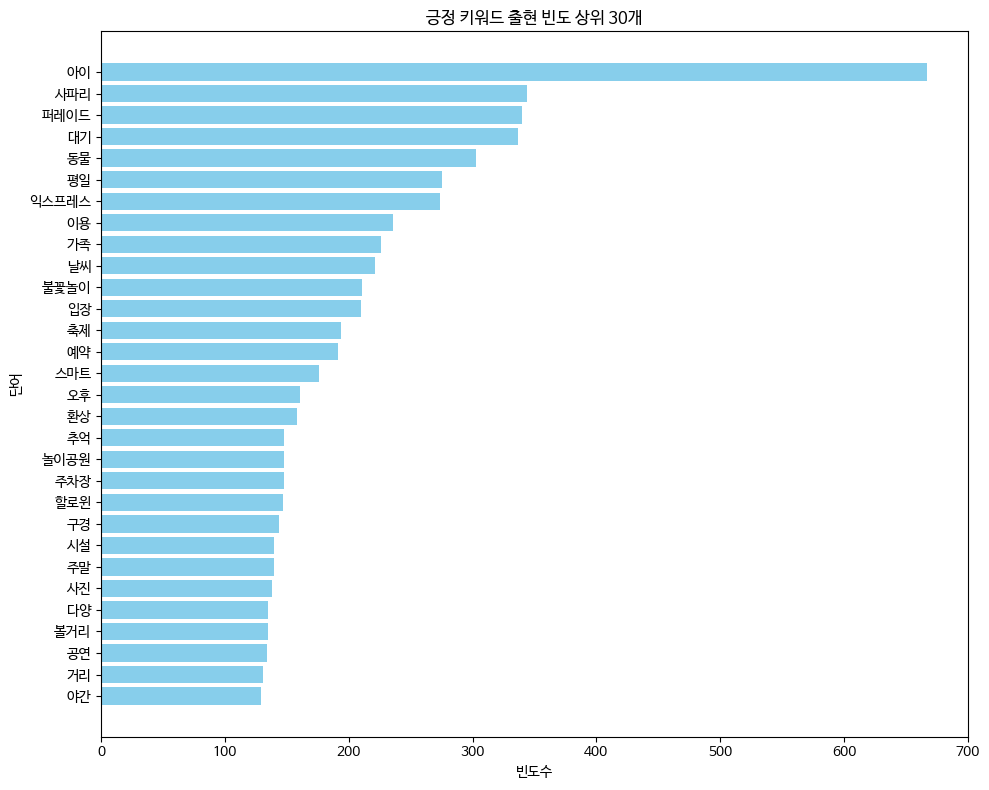

In [ ]:
import matplotlib.pyplot as plt

# Prepare data for plotting
pos_words, pos_counts = zip(*top_pos_words)
neg_words, neg_counts = zip(*top_neg_words)

# Create bar chart for top positive words
plt.figure(figsize=(10, 8))
plt.barh(pos_words[::-1], pos_counts[::-1], color='skyblue') # Reverse for better visualization
plt.title("긍정 키워드 출현 빈도 상위 30개")
plt.xlabel("빈도수")
plt.ylabel("단어")
plt.tight_layout()
plt.show()



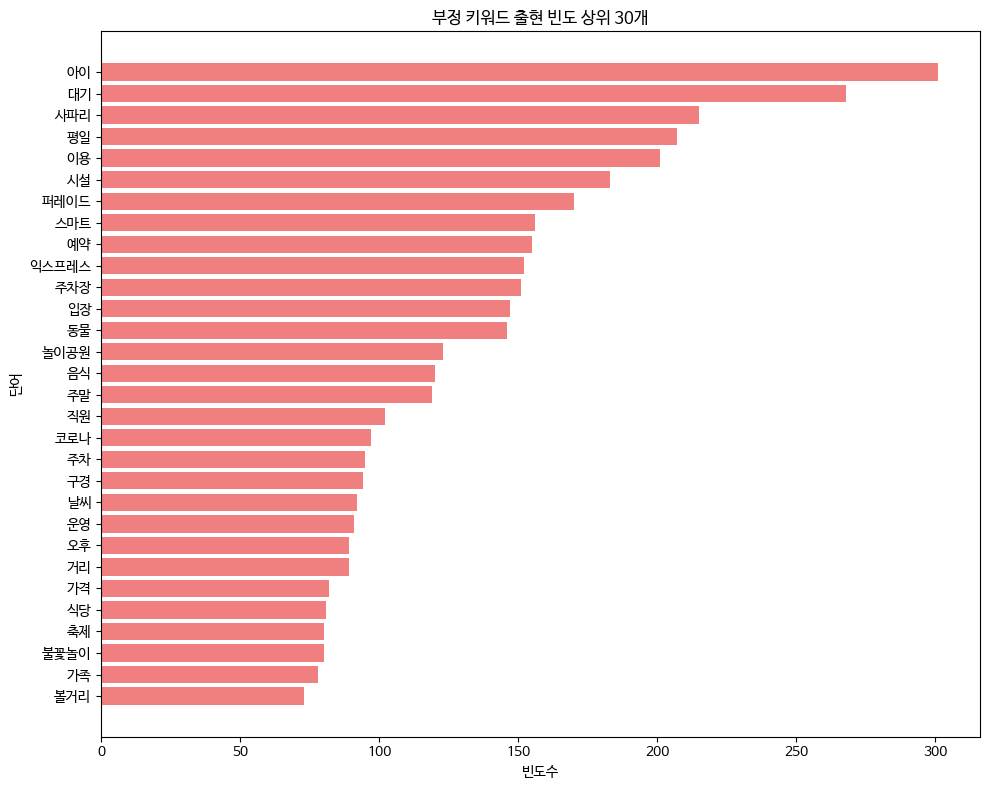

In [ ]:
# Create bar chart for top negative words
plt.figure(figsize=(10, 8))
plt.barh(neg_words[::-1], neg_counts[::-1], color='lightcoral') # Reverse for better visualization
plt.title("부정 키워드 출현 빈도 상위 30개")
plt.xlabel("빈도수")
plt.ylabel("단어")
plt.tight_layout()
plt.show()

## 워드클라우드 생성



In [ ]:
# Convert lists of tuples to dictionaries for word cloud
pos_word_dict = dict(top_pos_words)
neg_word_dict = dict(top_neg_words)

# Word cloud settings (positive)
wc_pos = WordCloud(
    font_path=font_path,
    background_color='white',
    width=800,
    height=600,
)

# Word cloud settings (negative)
wc_neg = WordCloud(
    font_path=font_path,
    background_color='white',
    width=800,
    height=600,
)


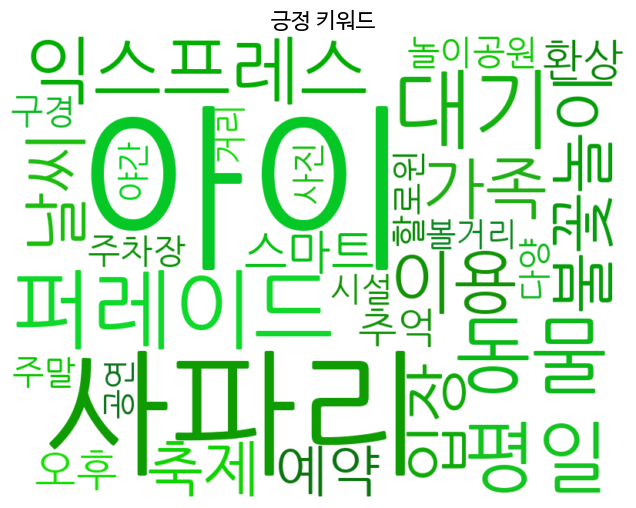

In [ ]:
# Generate and display the positive word cloud
plt.figure(figsize=(10,6))
plt.title("💙 긍정 키워드", fontsize=16)
plt.imshow(wc_pos.generate_from_frequencies(pos_word_dict).recolor(color_func=deep_green_color_func), interpolation='bilinear')
plt.axis('off')
plt.show()



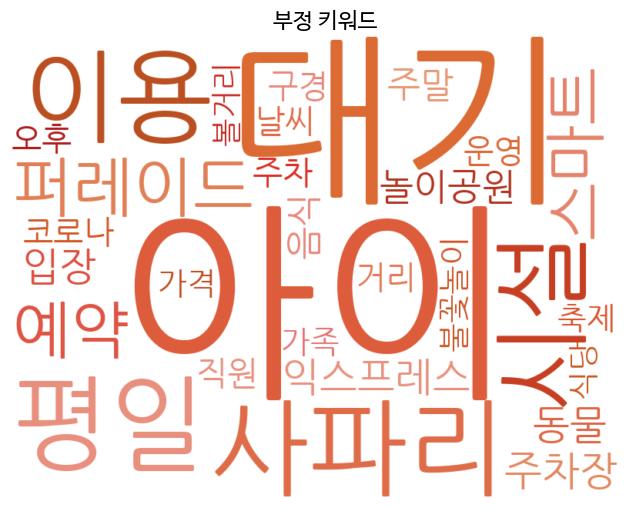

In [ ]:
# Generate and display the negative word cloud
plt.figure(figsize=(10,6))
plt.title("❤️ 부정 키워드", fontsize=16)
plt.imshow(wc_neg.generate_from_frequencies(neg_word_dict).recolor(color_func=red_color_func), interpolation='bilinear')
plt.axis('off')
plt.show()

---
# 머신러닝 2 (Word2Vec)

In [ ]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 50.7 MB/s eta 0:00:00


**Reasoning**:
Now that gensim is installed, train the Word2Vec model using the tokenized data.



In [ ]:
from gensim.models import Word2Vec

# Train Word2Vec model
# vector_size: dimensionality of the word vectors
# window: maximum distance between the current and predicted word within a sentence
# min_count: ignores all words with total frequency lower than this
# workers: number of worker threads to use for training
word2vec_model = Word2Vec(sentences=review['tokens'], vector_size=100, window=5, min_count=5, workers=4)

# You can save the model for later use if needed
# word2vec_model.save("word2vec.model")

## 문장 벡터화

### Subtask:
학습된 임베딩 모델을 사용하여 각 문장을 벡터로 변환합니다. (단어 벡터의 평균 또는 TF-IDF 가중 평균 사용)


**Reasoning**:
Define a function to convert a list of tokens into a sentence vector by averaging the Word2Vec vectors of the tokens, handling cases where tokens are not in the vocabulary or the sentence is empty. Then apply this function to the 'tokens' column to create the 'sentence_vector' column and display the shape of the resulting vectors.



In [ ]:
def get_sentence_vector(tokens, model):
    """
    Converts a list of tokens into a sentence vector by averaging their Word2Vec vectors.

    Args:
        tokens: A list of strings (tokens).
        model: A trained Word2Vec model.

    Returns:
        A numpy array representing the sentence vector.
    """
    valid_vectors = [model.wv[token] for token in tokens if token in model.wv]
    if not valid_vectors:
        return np.zeros(model.vector_size)  # Return a zero vector if no valid tokens
    return np.mean(valid_vectors, axis=0)

# Apply the function to create the 'sentence_vector' column
review['sentence_vector'] = review['tokens'].apply(lambda tokens: get_sentence_vector(tokens, word2vec_model))

# Display the shape of the first few sentence vectors to verify
print("Shape of the first few sentence vectors:")
for i in range(5):
    print(review['sentence_vector'][i].shape)

Shape of the first few sentence vectors:
(100,)
(100,)
(100,)
(100,)
(100,)


## Ml 분류기 학습 및 평가

### Subtask:
선택한 머신러닝 분류기(예: 로지스틱 회귀, SVM, 랜덤 포레스트 등)를 학습시키고 성능을 평가합니다.


**Reasoning**:
Set up the feature and target variables, split the data into training and testing sets, train a Logistic Regression model, make predictions, and evaluate the model using a classification report.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

# 1. Set up feature (X) and target (y) variables
X = np.vstack(review['sentence_vector'].values)  # Convert list of arrays to a 2D numpy array
y = review['라벨']

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Create Logistic Regression model object
logistic = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    n_jobs=-1
)

# 4. Train the Logistic Regression model
logistic.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = logistic.predict(X_test)

# 6. Evaluate the model and print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.35      0.62      0.45       656
           1       0.70      0.44      0.54      1312

    accuracy                           0.50      1968
   macro avg       0.53      0.53      0.49      1968
weighted avg       0.58      0.50      0.51      1968



In [ ]:
# Calculate word contributions to sentiment
word_contributions = {}
for word in word2vec_model.wv.index_to_key:
    if word in word2vec_model.wv:
        # Contribution is the dot product of the word vector and the logistic regression coefficients
        contribution = np.dot(word2vec_model.wv[word], logistic.coef_[0])
        word_contributions[word] = contribution

# Sort words by their contribution
sorted_contributions = sorted(word_contributions.items(), key=lambda item: item[1], reverse=True)

# Extract top 20 positive and negative words
top_pos_words_w2v = [word for word, contribution in sorted_contributions[:20]]
top_neg_words_w2v = [word for word, contribution in sorted_contributions[-20:]]

print("Top 20 Positive Words (Word2Vec + Logistic Regression):")
print(top_pos_words_w2v)

print("\nTop 20 Negative Words (Word2Vec + Logistic Regression):")
print(top_neg_words_w2v)

Top 20 Positive Words (Word2Vec + Logistic Regression):
['오기', '재밋게', '여파', '만발', '분수', '윙스', '삼성카드', '시전', '식물원', '보통', '꿀잼', '나위', '감탄', '유실', '재밋어요', '에버랜', '물건', '기업', '조화', '맛집']

Top 20 Negative Words (Word2Vec + Logistic Regression):
['자리', '시설', '이동', '식당', '어플', '운영', '스마트', '도착', '대기', '셔틀버스', '입구', '예약', '입장', '이용', '버스', '무료', '주차', '정문', '유료', '주차장']


## 결과 시각화

### Subtask:
추출된 키워드를 시각화합니다. (기존 코드 활용)


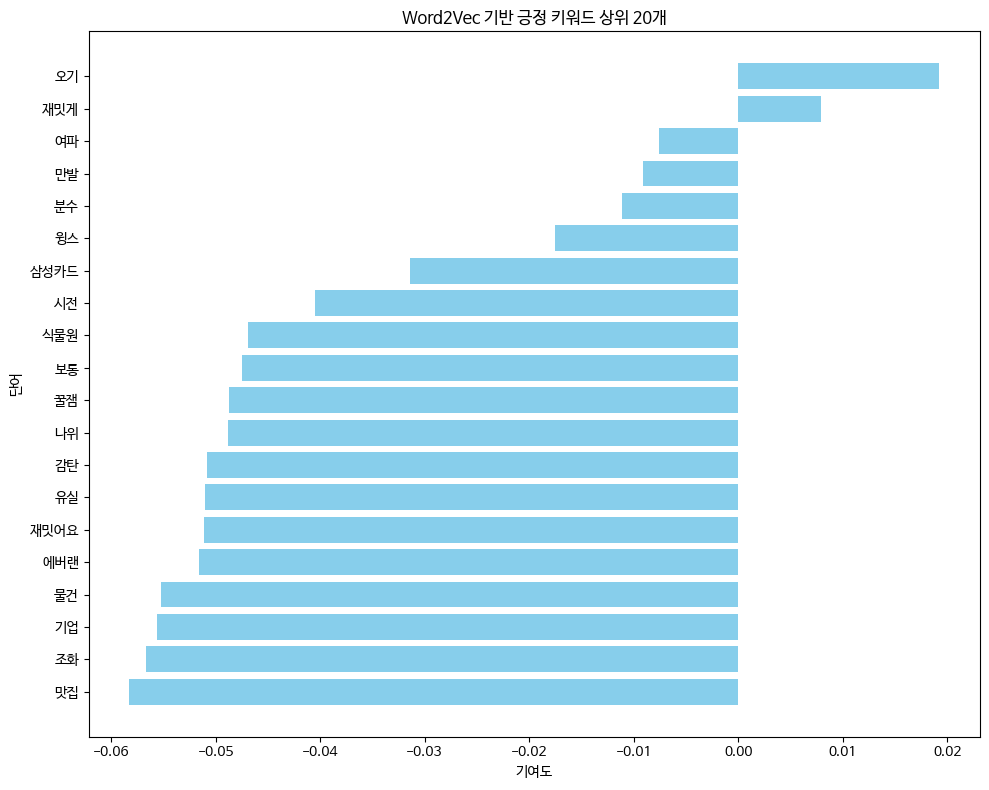

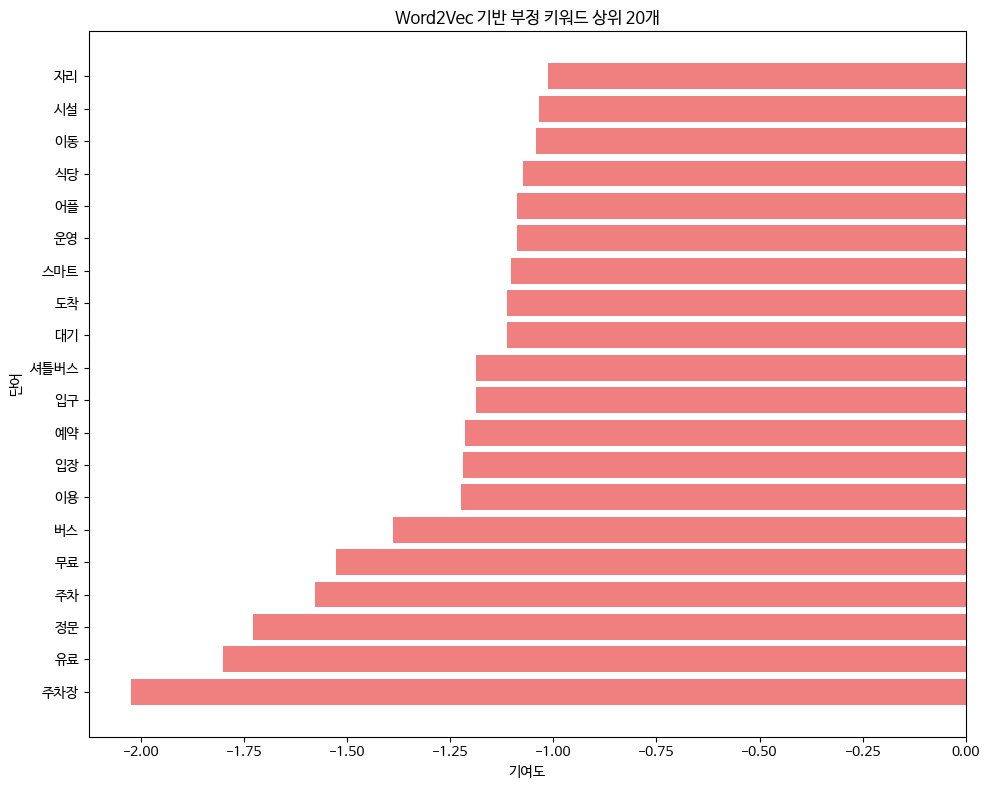

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for plotting positive keywords
pos_words_labels = top_pos_words_w2v
pos_contributions = [word_contributions[word] for word in pos_words_labels]

# Create bar chart for top 20 positive words
plt.figure(figsize=(10, 8))
plt.barh(pos_words_labels[::-1], pos_contributions[::-1], color='skyblue') # Reverse for better visualization
plt.title("Word2Vec 기반 긍정 키워드 상위 20개")
plt.xlabel("기여도")
plt.ylabel("단어")
plt.tight_layout()
plt.show()

# Prepare data for plotting negative keywords
neg_words_labels = top_neg_words_w2v
neg_contributions = [word_contributions[word] for word in neg_words_labels]

# Create bar chart for top 20 negative words
plt.figure(figsize=(10, 8))
plt.barh(neg_words_labels[::-1], neg_contributions[::-1], color='lightcoral') # Reverse for better visualization
plt.title("Word2Vec 기반 부정 키워드 상위 20개")
plt.xlabel("기여도")
plt.ylabel("단어")
plt.tight_layout()
plt.show()